In [1]:
import ROOT
from ROOT import RooFit as RF
import root_numpy as rnp
from root_pandas import read_root

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ks_2samp

%pylab inline  

Welcome to JupyROOT 6.14/04
Populating the interactive namespace from numpy and matplotlib


In [2]:
variables = ['BU_mass_Cjp', 'X_mass_Cjp', 'PHI_mass_Cjp', 'PIPI_mass_Cjp', 'dR_mu1', 'dR_mu2', 'dR_pi1', 'dR_pi2', 'dR_K1', 'dR_K2']

In [3]:
cuts_control_MC = {'X': 'X_mass_Cjp >' + str(3.872 - 0.025) + ' && X_mass_Cjp < ' + str(3.872 + 0.025), 
                   'psi': 'X_mass_Cjp >' + str(3.686 - 0.025) + ' && X_mass_Cjp < ' + str(3.686 + 0.025)}

left_discr_MC =  5.3669 - 0.035; right_discr_MC = 5.3669 + 0.035; nbins_discr_MC = 35
cuts_Bs_MC = 'BU_mass_Cjp > ' + str(left_discr_MC) + ' && BU_mass_Cjp < ' + str(right_discr_MC)  # + '&& PIPI_mass_Cjp > X_mass_Cjp - 3.0969 - 0.15'

left_phi_MC, right_phi_MC = 1.0195 - 0.016, 1.0195 + 0.016
cuts_phi_MC = 'PHI_mass_Cjp > ' + str(left_phi_MC) + ' && PHI_mass_Cjp < ' + str(right_phi_MC)  # TMath::Abs(PHI_mass_Cjp - 1.02)<0.01 &&

cuts_pipi = {'X': 'PIPI_mass_Cjp > 0.65 && PIPI_mass_Cjp < 0.78', 'psi': 'PIPI_mass_Cjp > 0.4 && PIPI_mass_Cjp < 0.6'}
# cuts_pipi = {'X': '1>0', 'psi': '1>0'}
cuts_match_dR = 'dR_mu1 < 0.05 && dR_mu2 < 0.05 && dR_pi1 < 0.05 && dR_pi2 < 0.05 && dR_K1 < 0.05 && dR_K2 < 0.05'
# cuts_match_dR = '1>0'

In [ ]:
X_MC = rnp.root2array('BsToXPhi_Smatch_v1_min_e233994.root', branches = variables, 
                      selection=cuts_Bs_MC + '&&' + cuts_phi_MC + '&&' + cuts_control_MC['X'] + ' && ' + cuts_pipi['X'] + ' && ' + cuts_match_dR) 
psi_MC = rnp.root2array('BsToPsiPhi_Smatch_v1_min_with_pt&eta_8e25fe7.root', branches = variables, 
                      selection=cuts_Bs_MC + '&&' + cuts_phi_MC + '&&' + cuts_control_MC['psi'] + ' && ' + cuts_pipi['psi'] + ' && ' + cuts_match_dR) 

In [65]:
X_MC.shape, psi_MC.shape

((33797,), (82187,))

In [66]:
ks_stat, ks_p = ks_2samp(psi_MC['PHI_mass_Cjp'], X_MC['PHI_mass_Cjp'])

In [67]:
print(f'p-value={ks_p}\nstatistic value={ks_stat}')

p-value=0.4266557986890384
statistic value=0.005656412804166344


/home/yaourt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


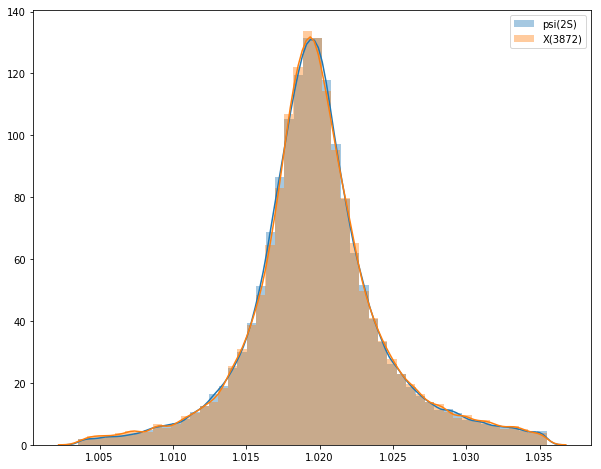

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(psi_MC['PHI_mass_Cjp'], ax=ax, kde=True, label='psi(2S)')
ax.legend()
sns.distplot(X_MC['PHI_mass_Cjp'], ax=ax, kde=True, label='X(3872)')
ax.legend()
fig.savefig('phimass_psi_vs_X.pdf')